Trey Tuscai and Gordon Doore

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Extension: VGG19

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2025-03-13 18:54:58.567512: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 18:54:58.637020: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

from datasets import get_dataset
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset("cifar10")

tf.keras.backend.clear_session()
tf.random.set_seed(0)

from vgg_nets import VGG16PlusPlus
tf.keras.backend.clear_session()
tf.random.set_seed(0)

model = VGG16PlusPlus(10, (32, 32, 3))
model.compile(optimizer='adamw')
train_loss_hist, val_loss_hist, val_acc_hist, num_epochs = model.fit(x_train, y_train, x_val, y_val, max_epochs=1000, patience = 10)
test_acc = model.evaluate(x_test, y_test)[0]
print(f'VGG15PlusPlus (Test Acc: {test_acc * 100:.2f}%)')

2025-03-13 18:55:05.951092: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20601 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


2025-03-13 18:55:09.540622: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90400


---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
DenseBlock2:
	Dropout layer output(DenseBlock2/dropout) shape: [1, 512]
	Dense layer output(DenseBlock2/dense_0) shape: [1, 512]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	Dropout layer output(ConvBlock5/dropout) shape: [1, 1, 1, 512]
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	Dropout layer output(ConvBlock4/dropout) shape: [1, 2, 2, 512]
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1) s

KeyboardInterrupt: 

In [4]:
#now let's run VGG16PlusPlus and VGG15PlusPlus with 2048 and 512 or 4096 neurons in the final dense blocks and compare the results of the 4 networks:
from vgg_nets import VGG16PlusPlus, VGG15PlusPlus

net_names = ['VGG16PlusPlus','VGG16PlusPlus' ,'VGG15PlusPlus', 'VGG15PlusPlus']
dense_neurons = [[(2048,), (512,)],[(512,), (512,)], [(512,), (512,)], [(2048,), (4096,)]]
train_losses = []
val_losses = []
val_accs = []
epochs = []

for i, net_name in enumerate(net_names):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    if net_name == 'VGG16PlusPlus':
        model = VGG16PlusPlus(10, (32, 32, 3), dense_units = dense_neurons[i], wt_scale = 1e-4, reg = 0.3)
            
    elif net_name == 'VGG15PlusPlus':
        model = VGG15PlusPlus(10, (32, 32, 3), dense_units = dense_neurons[i][0],wt_scale = 1e-4, reg = 0.3)

    model.compile(optimizer='adamw')
    train_loss_hist, val_loss_hist, val_acc_hist, num_epochs = model.fit(x_train, y_train, x_val, y_val, max_epochs=1000, patience = 10)
    test_acc = model.evaluate(x_test, y_test)[0]

    train_losses.append(train_loss_hist)
    val_losses.append(val_loss_hist)
    val_accs.append(val_acc_hist)
    epochs.append(num_epochs)

    test_acc = model.evaluate(x_test, y_test)[0]

---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
DenseBlock2:
	Dropout layer output(DenseBlock2/dropout) shape: [1, 512]
	Dense layer output(DenseBlock2/dense_0) shape: [1, 512]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 2048]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 2048]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	Dropout layer output(ConvBlock5/dropout) shape: [1, 1, 1, 512]
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	Dropout layer output(ConvBlock4/dropout) shape: [1, 2, 2, 512]
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1)

I0000 00:00:1741892134.046903    2109 service.cc:145] XLA service 0x779db37e5780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741892134.046941    2109 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-03-13 18:55:34.054404: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741892134.134458    2109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1: Training Loss = 2.0626, Validation Loss = 1.8388, Validation Accuracy = 0.2163
Epoch 1/1000 took 20.3299 seconds


Epoch 2: Training Loss = 1.8513, Validation Loss = 1.7525, Validation Accuracy = 0.2921
Epoch 2/1000 took 8.5558 seconds


Epoch 3: Training Loss = 1.7065, Validation Loss = 1.5872, Validation Accuracy = 0.3888
Epoch 3/1000 took 8.5822 seconds


Epoch 4: Training Loss = 1.5145, Validation Loss = 1.3097, Validation Accuracy = 0.4964
Epoch 4/1000 took 8.6171 seconds


Epoch 5: Training Loss = 1.3587, Validation Loss = 1.2228, Validation Accuracy = 0.5220
Epoch 5/1000 took 8.6416 seconds


Epoch 6: Training Loss = 1.2358, Validation Loss = 1.0731, Validation Accuracy = 0.6214
Epoch 6/1000 took 8.6689 seconds


Epoch 7: Training Loss = 1.1094, Validation Loss = 0.9584, Validation Accuracy = 0.6747
Epoch 7/1000 took 8.6957 seconds


Epoch 8: Training Loss = 1.0049, Validation Loss = 0.8552, Validation Accuracy = 0.7079
Epoch 8/1000 took 8.7243 seconds


Epoch 9: Training Loss = 0.9238, Validation Loss = 0.8668, Validation Accuracy = 0.7041
Epoch 9/1000 took 8.7528 seconds


Epoch 10: Training Loss = 0.8708, Validation Loss = 0.7695, Validation Accuracy = 0.7348
Epoch 10/1000 took 8.7437 seconds


Epoch 11: Training Loss = 0.8183, Validation Loss = 0.7787, Validation Accuracy = 0.7458
Epoch 11/1000 took 8.7176 seconds


Epoch 12: Training Loss = 0.7786, Validation Loss = 0.7316, Validation Accuracy = 0.7592
Epoch 12/1000 took 8.6621 seconds


Epoch 13: Training Loss = 0.7265, Validation Loss = 0.7422, Validation Accuracy = 0.7750
Epoch 13/1000 took 8.6970 seconds


Epoch 14: Training Loss = 0.6973, Validation Loss = 0.7597, Validation Accuracy = 0.7622
Epoch 14/1000 took 8.6963 seconds


Epoch 15: Training Loss = 0.6915, Validation Loss = 0.6394, Validation Accuracy = 0.7929
Epoch 15/1000 took 8.6497 seconds


Epoch 16: Training Loss = 0.6518, Validation Loss = 0.6240, Validation Accuracy = 0.7965
Epoch 16/1000 took 8.6749 seconds


Epoch 17: Training Loss = 0.6653, Validation Loss = 0.6645, Validation Accuracy = 0.7863
Epoch 17/1000 took 8.6825 seconds


Epoch 18: Training Loss = 0.6227, Validation Loss = 0.5867, Validation Accuracy = 0.8129
Epoch 18/1000 took 8.6885 seconds


Epoch 19: Training Loss = 0.6010, Validation Loss = 0.6007, Validation Accuracy = 0.8117
Epoch 19/1000 took 8.7220 seconds


Epoch 20: Training Loss = 0.5891, Validation Loss = 0.6076, Validation Accuracy = 0.8109
Epoch 20/1000 took 8.7176 seconds


Epoch 21: Training Loss = 0.5708, Validation Loss = 0.6009, Validation Accuracy = 0.8027
Epoch 21/1000 took 8.6999 seconds


Epoch 22: Training Loss = 0.5653, Validation Loss = 0.6199, Validation Accuracy = 0.8091
Epoch 22/1000 took 8.6861 seconds


Epoch 23: Training Loss = 0.5660, Validation Loss = 0.6879, Validation Accuracy = 0.7905
Epoch 23/1000 took 8.7018 seconds


Epoch 24: Training Loss = 0.5642, Validation Loss = 0.5156, Validation Accuracy = 0.8345
Epoch 24/1000 took 8.7373 seconds


Epoch 25: Training Loss = 0.5446, Validation Loss = 0.6620, Validation Accuracy = 0.8055
Epoch 25/1000 took 8.7322 seconds


Epoch 26: Training Loss = 0.5377, Validation Loss = 0.5390, Validation Accuracy = 0.8317
Epoch 26/1000 took 8.7317 seconds


Epoch 27: Training Loss = 0.5172, Validation Loss = 0.5317, Validation Accuracy = 0.8297
Epoch 27/1000 took 8.7283 seconds


Epoch 28: Training Loss = 0.5204, Validation Loss = 0.5780, Validation Accuracy = 0.8133
Epoch 28/1000 took 8.7310 seconds


Epoch 29: Training Loss = 0.5200, Validation Loss = 0.5394, Validation Accuracy = 0.8301
Epoch 29/1000 took 8.7074 seconds


Epoch 30: Training Loss = 0.4993, Validation Loss = 0.5539, Validation Accuracy = 0.8239
Epoch 30/1000 took 8.7364 seconds


Epoch 31: Training Loss = 0.5051, Validation Loss = 0.5262, Validation Accuracy = 0.8345
Epoch 31/1000 took 8.7271 seconds


Epoch 32: Training Loss = 0.5092, Validation Loss = 0.5292, Validation Accuracy = 0.8347
Epoch 32/1000 took 8.6748 seconds


Epoch 33: Training Loss = 0.4874, Validation Loss = 0.5125, Validation Accuracy = 0.8442
Epoch 33/1000 took 8.6459 seconds


Epoch 34: Training Loss = 0.4949, Validation Loss = 0.5125, Validation Accuracy = 0.8444
Epoch 34/1000 took 8.6507 seconds


Epoch 35: Training Loss = 0.4829, Validation Loss = 0.5603, Validation Accuracy = 0.8339
Epoch 35/1000 took 8.6640 seconds


Epoch 36: Training Loss = 0.4860, Validation Loss = 0.5395, Validation Accuracy = 0.8287
Epoch 36/1000 took 8.7362 seconds


Epoch 37: Training Loss = 0.4716, Validation Loss = 0.5886, Validation Accuracy = 0.8213
Epoch 37/1000 took 8.6796 seconds


Epoch 38: Training Loss = 0.4866, Validation Loss = 0.5823, Validation Accuracy = 0.8271
Epoch 38/1000 took 8.7067 seconds


Epoch 39: Training Loss = 0.4779, Validation Loss = 0.5331, Validation Accuracy = 0.8399
Epoch 39/1000 took 8.6975 seconds


Epoch 40: Training Loss = 0.4660, Validation Loss = 0.4934, Validation Accuracy = 0.8431
Epoch 40/1000 took 8.7046 seconds


Epoch 41: Training Loss = 0.4669, Validation Loss = 0.5875, Validation Accuracy = 0.8287
Epoch 41/1000 took 8.6926 seconds


Epoch 42: Training Loss = 0.4766, Validation Loss = 0.5489, Validation Accuracy = 0.8409
Epoch 42/1000 took 8.6791 seconds


Epoch 43: Training Loss = 0.4630, Validation Loss = 0.5781, Validation Accuracy = 0.8281
Epoch 43/1000 took 8.6752 seconds


Epoch 44: Training Loss = 0.4578, Validation Loss = 0.4760, Validation Accuracy = 0.8450
Epoch 44/1000 took 8.7050 seconds


Epoch 45: Training Loss = 0.4501, Validation Loss = 0.4909, Validation Accuracy = 0.8472
Epoch 45/1000 took 8.7112 seconds


Epoch 46: Training Loss = 0.4638, Validation Loss = 0.5410, Validation Accuracy = 0.8317
Epoch 46/1000 took 8.6918 seconds


Epoch 47: Training Loss = 0.4481, Validation Loss = 0.5512, Validation Accuracy = 0.8283
Epoch 47/1000 took 8.6959 seconds


Epoch 48: Training Loss = 0.4430, Validation Loss = 0.5235, Validation Accuracy = 0.8343
Epoch 48/1000 took 8.6946 seconds


Epoch 49: Training Loss = 0.4385, Validation Loss = 0.5157, Validation Accuracy = 0.8409
Epoch 49/1000 took 8.6749 seconds


Epoch 50: Training Loss = 0.4409, Validation Loss = 0.5651, Validation Accuracy = 0.8193
Epoch 50/1000 took 8.6877 seconds


Epoch 51: Training Loss = 0.4502, Validation Loss = 0.4915, Validation Accuracy = 0.8494
Epoch 51/1000 took 8.7066 seconds


Epoch 52: Training Loss = 0.4481, Validation Loss = 0.5729, Validation Accuracy = 0.8287
Epoch 52/1000 took 8.6633 seconds


Epoch 53: Training Loss = 0.4463, Validation Loss = 0.6093, Validation Accuracy = 0.8209
Early stopping triggered at epoch 53
Finished training after 53 epochs!


---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
DenseBlock2:
	Dropout layer output(DenseBlock2/dropout) shape: [1, 512]
	Dense layer output(DenseBlock2/dense_0) shape: [1, 512]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	Dropout layer output(ConvBlock5/dropout) shape: [1, 1, 1, 512]
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	Dropout layer output(ConvBlock4/dropout) shape: [1, 2, 2, 512]
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1) s

Epoch 1: Training Loss = 2.0853, Validation Loss = 1.8717, Validation Accuracy = 0.2111
Epoch 1/1000 took 15.8978 seconds


Epoch 2: Training Loss = 1.8542, Validation Loss = 1.7741, Validation Accuracy = 0.2672
Epoch 2/1000 took 8.5947 seconds


Epoch 3: Training Loss = 1.7013, Validation Loss = 1.4976, Validation Accuracy = 0.4020
Epoch 3/1000 took 8.5779 seconds


Epoch 4: Training Loss = 1.4731, Validation Loss = 1.3273, Validation Accuracy = 0.4700
Epoch 4/1000 took 8.5409 seconds


Epoch 5: Training Loss = 1.3379, Validation Loss = 1.1768, Validation Accuracy = 0.5683
Epoch 5/1000 took 8.5480 seconds


Epoch 6: Training Loss = 1.2035, Validation Loss = 1.0225, Validation Accuracy = 0.6392
Epoch 6/1000 took 8.5561 seconds


Epoch 7: Training Loss = 1.1027, Validation Loss = 0.9576, Validation Accuracy = 0.6725
Epoch 7/1000 took 8.5062 seconds


Epoch 8: Training Loss = 0.9876, Validation Loss = 0.9178, Validation Accuracy = 0.6831
Epoch 8/1000 took 8.5185 seconds


Epoch 9: Training Loss = 0.9124, Validation Loss = 0.8230, Validation Accuracy = 0.7173
Epoch 9/1000 took 8.5058 seconds


Epoch 10: Training Loss = 0.8639, Validation Loss = 0.7907, Validation Accuracy = 0.7404
Epoch 10/1000 took 8.4949 seconds


Epoch 11: Training Loss = 0.8092, Validation Loss = 0.8039, Validation Accuracy = 0.7360
Epoch 11/1000 took 8.5008 seconds


Epoch 12: Training Loss = 0.7829, Validation Loss = 0.7596, Validation Accuracy = 0.7486
Epoch 12/1000 took 8.4837 seconds


Epoch 13: Training Loss = 0.7387, Validation Loss = 0.7163, Validation Accuracy = 0.7618
Epoch 13/1000 took 8.5553 seconds


Epoch 14: Training Loss = 0.7070, Validation Loss = 0.7200, Validation Accuracy = 0.7610
Epoch 14/1000 took 8.5084 seconds


Epoch 15: Training Loss = 0.7072, Validation Loss = 0.7530, Validation Accuracy = 0.7608
Epoch 15/1000 took 8.5328 seconds


Epoch 16: Training Loss = 0.6667, Validation Loss = 0.6773, Validation Accuracy = 0.7819
Epoch 16/1000 took 8.5508 seconds


Epoch 17: Training Loss = 0.6610, Validation Loss = 0.6892, Validation Accuracy = 0.7768
Epoch 17/1000 took 8.5221 seconds


Epoch 18: Training Loss = 0.6310, Validation Loss = 0.7092, Validation Accuracy = 0.7794
Epoch 18/1000 took 8.5291 seconds


Epoch 19: Training Loss = 0.6331, Validation Loss = 0.6307, Validation Accuracy = 0.7957
Epoch 19/1000 took 8.5086 seconds


Epoch 20: Training Loss = 0.6197, Validation Loss = 0.6256, Validation Accuracy = 0.8033
Epoch 20/1000 took 8.5210 seconds


Epoch 21: Training Loss = 0.6014, Validation Loss = 0.6287, Validation Accuracy = 0.8015
Epoch 21/1000 took 8.5392 seconds


Epoch 22: Training Loss = 0.5874, Validation Loss = 0.6321, Validation Accuracy = 0.8031
Epoch 22/1000 took 8.4951 seconds


Epoch 23: Training Loss = 0.5790, Validation Loss = 0.6493, Validation Accuracy = 0.8039
Epoch 23/1000 took 8.4860 seconds


Epoch 24: Training Loss = 0.5746, Validation Loss = 0.6136, Validation Accuracy = 0.8065
Epoch 24/1000 took 8.5231 seconds


Epoch 25: Training Loss = 0.5484, Validation Loss = 0.6065, Validation Accuracy = 0.8173
Epoch 25/1000 took 8.5452 seconds


Epoch 26: Training Loss = 0.5586, Validation Loss = 0.6402, Validation Accuracy = 0.7977
Epoch 26/1000 took 8.5225 seconds


Epoch 27: Training Loss = 0.5522, Validation Loss = 0.5653, Validation Accuracy = 0.8217
Epoch 27/1000 took 8.5012 seconds


Epoch 28: Training Loss = 0.5293, Validation Loss = 0.5765, Validation Accuracy = 0.8283
Epoch 28/1000 took 8.5273 seconds


Epoch 29: Training Loss = 0.5562, Validation Loss = 0.5439, Validation Accuracy = 0.8311
Epoch 29/1000 took 8.5655 seconds


Epoch 30: Training Loss = 0.5220, Validation Loss = 0.5802, Validation Accuracy = 0.8187
Epoch 30/1000 took 8.5639 seconds


Epoch 31: Training Loss = 0.5231, Validation Loss = 0.5515, Validation Accuracy = 0.8249
Epoch 31/1000 took 8.5567 seconds


Epoch 32: Training Loss = 0.5218, Validation Loss = 0.5577, Validation Accuracy = 0.8249
Epoch 32/1000 took 8.5056 seconds


Epoch 33: Training Loss = 0.5058, Validation Loss = 0.5841, Validation Accuracy = 0.8275
Epoch 33/1000 took 8.5147 seconds


Epoch 34: Training Loss = 0.5121, Validation Loss = 0.6358, Validation Accuracy = 0.8019
Epoch 34/1000 took 8.5129 seconds


Epoch 35: Training Loss = 0.5052, Validation Loss = 0.6189, Validation Accuracy = 0.8093
Epoch 35/1000 took 8.5156 seconds


Epoch 36: Training Loss = 0.4920, Validation Loss = 0.5461, Validation Accuracy = 0.8285
Epoch 36/1000 took 8.5526 seconds


Epoch 37: Training Loss = 0.4932, Validation Loss = 0.5817, Validation Accuracy = 0.8253
Epoch 37/1000 took 8.5206 seconds


Epoch 38: Training Loss = 0.4920, Validation Loss = 0.5801, Validation Accuracy = 0.8281
Early stopping triggered at epoch 38
Finished training after 38 epochs!


---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	Dropout layer output(ConvBlock5/dropout) shape: [1, 1, 1, 512]
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	Dropout layer output(ConvBlock4/dropout) shape: [1, 2, 2, 512]
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_0) shape: [1, 4, 4, 512]
ConvBlock3:
	Dropout layer output(ConvBlock3/d

Epoch 1: Training Loss = 2.0774, Validation Loss = 1.8473, Validation Accuracy = 0.2416
Epoch 1/1000 took 15.3324 seconds


Epoch 2: Training Loss = 1.7672, Validation Loss = 1.4946, Validation Accuracy = 0.4069
Epoch 2/1000 took 8.4728 seconds


Epoch 3: Training Loss = 1.5155, Validation Loss = 1.3982, Validation Accuracy = 0.4850
Epoch 3/1000 took 8.4868 seconds


Epoch 4: Training Loss = 1.3280, Validation Loss = 1.2031, Validation Accuracy = 0.5725
Epoch 4/1000 took 8.4990 seconds


Epoch 5: Training Loss = 1.1730, Validation Loss = 0.9981, Validation Accuracy = 0.6474
Epoch 5/1000 took 8.4671 seconds


Epoch 6: Training Loss = 1.0578, Validation Loss = 0.9343, Validation Accuracy = 0.6733
Epoch 6/1000 took 8.4558 seconds


Epoch 7: Training Loss = 0.9521, Validation Loss = 0.8266, Validation Accuracy = 0.7161
Epoch 7/1000 took 8.4370 seconds


Epoch 8: Training Loss = 0.8633, Validation Loss = 0.8106, Validation Accuracy = 0.7238
Epoch 8/1000 took 8.4043 seconds


Epoch 9: Training Loss = 0.8162, Validation Loss = 0.7765, Validation Accuracy = 0.7414
Epoch 9/1000 took 8.3870 seconds


Epoch 10: Training Loss = 0.7679, Validation Loss = 0.7094, Validation Accuracy = 0.7656
Epoch 10/1000 took 8.4189 seconds


Epoch 11: Training Loss = 0.7172, Validation Loss = 0.7150, Validation Accuracy = 0.7694
Epoch 11/1000 took 8.4161 seconds


Epoch 12: Training Loss = 0.6819, Validation Loss = 0.6649, Validation Accuracy = 0.7915
Epoch 12/1000 took 8.4245 seconds


Epoch 13: Training Loss = 0.6464, Validation Loss = 0.7057, Validation Accuracy = 0.7847
Epoch 13/1000 took 8.4209 seconds


Epoch 14: Training Loss = 0.6343, Validation Loss = 0.6505, Validation Accuracy = 0.7917
Epoch 14/1000 took 8.3862 seconds


Epoch 15: Training Loss = 0.6141, Validation Loss = 0.6618, Validation Accuracy = 0.7919
Epoch 15/1000 took 8.4656 seconds


Epoch 16: Training Loss = 0.5927, Validation Loss = 0.6911, Validation Accuracy = 0.7802
Epoch 16/1000 took 8.4688 seconds


Epoch 17: Training Loss = 0.5796, Validation Loss = 0.5644, Validation Accuracy = 0.8209
Epoch 17/1000 took 8.4292 seconds


Epoch 18: Training Loss = 0.5683, Validation Loss = 0.6057, Validation Accuracy = 0.8065
Epoch 18/1000 took 8.4191 seconds


Epoch 19: Training Loss = 0.5565, Validation Loss = 0.6246, Validation Accuracy = 0.7997
Epoch 19/1000 took 8.4660 seconds


Epoch 20: Training Loss = 0.5424, Validation Loss = 0.6474, Validation Accuracy = 0.7923
Epoch 20/1000 took 8.4398 seconds


Epoch 21: Training Loss = 0.5252, Validation Loss = 0.6144, Validation Accuracy = 0.8029
Epoch 21/1000 took 8.4426 seconds


Epoch 22: Training Loss = 0.5148, Validation Loss = 0.5791, Validation Accuracy = 0.8197
Epoch 22/1000 took 8.4306 seconds


Epoch 23: Training Loss = 0.4951, Validation Loss = 0.6108, Validation Accuracy = 0.8183
Epoch 23/1000 took 8.4229 seconds


Epoch 24: Training Loss = 0.5071, Validation Loss = 0.5644, Validation Accuracy = 0.8265
Epoch 24/1000 took 8.4221 seconds


Epoch 25: Training Loss = 0.4869, Validation Loss = 0.6653, Validation Accuracy = 0.7931
Epoch 25/1000 took 8.4358 seconds


Epoch 26: Training Loss = 0.4899, Validation Loss = 0.5981, Validation Accuracy = 0.8199
Epoch 26/1000 took 8.4200 seconds


Epoch 27: Training Loss = 0.4888, Validation Loss = 0.5376, Validation Accuracy = 0.8341
Epoch 27/1000 took 8.4208 seconds


Epoch 28: Training Loss = 0.4744, Validation Loss = 0.5611, Validation Accuracy = 0.8247
Epoch 28/1000 took 8.4151 seconds


Epoch 29: Training Loss = 0.4676, Validation Loss = 0.5323, Validation Accuracy = 0.8446
Epoch 29/1000 took 8.4476 seconds


Epoch 30: Training Loss = 0.4596, Validation Loss = 0.5867, Validation Accuracy = 0.8221
Epoch 30/1000 took 8.4511 seconds


Epoch 31: Training Loss = 0.4461, Validation Loss = 0.5773, Validation Accuracy = 0.8293
Epoch 31/1000 took 8.4490 seconds


Epoch 32: Training Loss = 0.4556, Validation Loss = 0.5443, Validation Accuracy = 0.8337
Epoch 32/1000 took 8.4419 seconds


Epoch 33: Training Loss = 0.4496, Validation Loss = 0.5477, Validation Accuracy = 0.8345
Epoch 33/1000 took 8.4680 seconds


Epoch 34: Training Loss = 0.4510, Validation Loss = 0.5156, Validation Accuracy = 0.8425
Epoch 34/1000 took 8.4758 seconds


Epoch 35: Training Loss = 0.4316, Validation Loss = 0.5523, Validation Accuracy = 0.8271
Epoch 35/1000 took 8.4434 seconds


Epoch 36: Training Loss = 0.4347, Validation Loss = 0.5545, Validation Accuracy = 0.8273
Epoch 36/1000 took 8.4459 seconds


Epoch 37: Training Loss = 0.4346, Validation Loss = 0.5149, Validation Accuracy = 0.8377
Epoch 37/1000 took 8.4115 seconds


Epoch 38: Training Loss = 0.4332, Validation Loss = 0.5542, Validation Accuracy = 0.8305
Epoch 38/1000 took 8.4641 seconds


Epoch 39: Training Loss = 0.4248, Validation Loss = 0.5494, Validation Accuracy = 0.8305
Epoch 39/1000 took 8.4375 seconds


Epoch 40: Training Loss = 0.4143, Validation Loss = 0.5365, Validation Accuracy = 0.8381
Epoch 40/1000 took 8.4384 seconds


Epoch 41: Training Loss = 0.4380, Validation Loss = 0.5220, Validation Accuracy = 0.8379
Epoch 41/1000 took 8.4373 seconds


Epoch 42: Training Loss = 0.4037, Validation Loss = 0.5261, Validation Accuracy = 0.8433
Epoch 42/1000 took 8.4550 seconds


Epoch 43: Training Loss = 0.4171, Validation Loss = 0.5803, Validation Accuracy = 0.8279
Epoch 43/1000 took 8.4853 seconds


Epoch 44: Training Loss = 0.4081, Validation Loss = 0.5308, Validation Accuracy = 0.8433
Epoch 44/1000 took 8.4587 seconds


Epoch 45: Training Loss = 0.4124, Validation Loss = 0.5957, Validation Accuracy = 0.8283
Epoch 45/1000 took 8.4635 seconds


Epoch 46: Training Loss = 0.4122, Validation Loss = 0.5427, Validation Accuracy = 0.8379
Early stopping triggered at epoch 46
Finished training after 46 epochs!


---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 2048]
	Dense layer output(DenseBlock1/dense_0) shape: [1, 2048]
Flatten layer output(flat) shape: [1, 512]
ConvBlock5:
	Dropout layer output(ConvBlock5/dropout) shape: [1, 1, 1, 512]
	MaxPool2D layer output(ConvBlock5/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock5/conv_0) shape: [1, 2, 2, 512]
ConvBlock4:
	Dropout layer output(ConvBlock4/dropout) shape: [1, 2, 2, 512]
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock4/conv_0) shape: [1, 4, 4, 512]
ConvBlock3:
	Dropout layer output(ConvBlock3

Epoch 1: Training Loss = 2.0450, Validation Loss = 1.8265, Validation Accuracy = 0.2698
Epoch 1/1000 took 15.2759 seconds


Epoch 2: Training Loss = 1.7425, Validation Loss = 1.5404, Validation Accuracy = 0.3828
Epoch 2/1000 took 8.5604 seconds


Epoch 3: Training Loss = 1.5122, Validation Loss = 1.3033, Validation Accuracy = 0.5110
Epoch 3/1000 took 8.5843 seconds


Epoch 4: Training Loss = 1.2982, Validation Loss = 1.1816, Validation Accuracy = 0.5777
Epoch 4/1000 took 8.5989 seconds


Epoch 5: Training Loss = 1.1486, Validation Loss = 1.0344, Validation Accuracy = 0.6286
Epoch 5/1000 took 8.5883 seconds


Epoch 6: Training Loss = 1.0437, Validation Loss = 0.9710, Validation Accuracy = 0.6687
Epoch 6/1000 took 8.5354 seconds


Epoch 7: Training Loss = 0.9410, Validation Loss = 0.8543, Validation Accuracy = 0.7071
Epoch 7/1000 took 8.5462 seconds


Epoch 8: Training Loss = 0.8523, Validation Loss = 0.8029, Validation Accuracy = 0.7278
Epoch 8/1000 took 8.5270 seconds


Epoch 9: Training Loss = 0.8034, Validation Loss = 0.7369, Validation Accuracy = 0.7564
Epoch 9/1000 took 8.5305 seconds


Epoch 10: Training Loss = 0.7464, Validation Loss = 0.6991, Validation Accuracy = 0.7680
Epoch 10/1000 took 8.5241 seconds


Epoch 11: Training Loss = 0.7026, Validation Loss = 0.6733, Validation Accuracy = 0.7750
Epoch 11/1000 took 8.5002 seconds


Epoch 12: Training Loss = 0.6724, Validation Loss = 0.6326, Validation Accuracy = 0.7919
Epoch 12/1000 took 8.5175 seconds


Epoch 13: Training Loss = 0.6313, Validation Loss = 0.6128, Validation Accuracy = 0.7991
Epoch 13/1000 took 8.5131 seconds


Epoch 14: Training Loss = 0.6247, Validation Loss = 0.6816, Validation Accuracy = 0.7790
Epoch 14/1000 took 8.5094 seconds


Epoch 15: Training Loss = 0.6092, Validation Loss = 0.6244, Validation Accuracy = 0.7965
Epoch 15/1000 took 8.5480 seconds


Epoch 16: Training Loss = 0.5900, Validation Loss = 0.6595, Validation Accuracy = 0.7963
Epoch 16/1000 took 8.5051 seconds


Epoch 17: Training Loss = 0.5813, Validation Loss = 0.5827, Validation Accuracy = 0.8093
Epoch 17/1000 took 8.5208 seconds


Epoch 18: Training Loss = 0.5563, Validation Loss = 0.6582, Validation Accuracy = 0.7915
Epoch 18/1000 took 8.5226 seconds


Epoch 19: Training Loss = 0.5567, Validation Loss = 0.6620, Validation Accuracy = 0.7893
Epoch 19/1000 took 8.5368 seconds


Epoch 20: Training Loss = 0.5419, Validation Loss = 0.6000, Validation Accuracy = 0.8035
Epoch 20/1000 took 8.4759 seconds


Epoch 21: Training Loss = 0.5251, Validation Loss = 0.5947, Validation Accuracy = 0.8179
Epoch 21/1000 took 8.5003 seconds


Epoch 22: Training Loss = 0.5152, Validation Loss = 0.5621, Validation Accuracy = 0.8197
Epoch 22/1000 took 8.5323 seconds


Epoch 23: Training Loss = 0.5199, Validation Loss = 0.5751, Validation Accuracy = 0.8187
Epoch 23/1000 took 8.5665 seconds


Epoch 24: Training Loss = 0.4991, Validation Loss = 0.5417, Validation Accuracy = 0.8213
Epoch 24/1000 took 8.5172 seconds


Epoch 25: Training Loss = 0.5004, Validation Loss = 0.5818, Validation Accuracy = 0.8191
Epoch 25/1000 took 8.4948 seconds


Epoch 26: Training Loss = 0.4825, Validation Loss = 0.6125, Validation Accuracy = 0.8157
Epoch 26/1000 took 8.4934 seconds


Epoch 27: Training Loss = 0.4857, Validation Loss = 0.5727, Validation Accuracy = 0.8345
Epoch 27/1000 took 8.5301 seconds


Epoch 28: Training Loss = 0.4736, Validation Loss = 0.5313, Validation Accuracy = 0.8321
Epoch 28/1000 took 8.5486 seconds


Epoch 29: Training Loss = 0.4800, Validation Loss = 0.5215, Validation Accuracy = 0.8353
Epoch 29/1000 took 8.4950 seconds


Epoch 30: Training Loss = 0.4599, Validation Loss = 0.5524, Validation Accuracy = 0.8205
Epoch 30/1000 took 8.4816 seconds


Epoch 31: Training Loss = 0.4590, Validation Loss = 0.5495, Validation Accuracy = 0.8269
Epoch 31/1000 took 8.4675 seconds


Epoch 32: Training Loss = 0.4544, Validation Loss = 0.5272, Validation Accuracy = 0.8397
Epoch 32/1000 took 8.5124 seconds


Epoch 33: Training Loss = 0.4626, Validation Loss = 0.5486, Validation Accuracy = 0.8243
Epoch 33/1000 took 8.5070 seconds


Epoch 34: Training Loss = 0.4448, Validation Loss = 0.5973, Validation Accuracy = 0.8215
Epoch 34/1000 took 8.4934 seconds


Epoch 35: Training Loss = 0.4483, Validation Loss = 0.5471, Validation Accuracy = 0.8321
Epoch 35/1000 took 8.5143 seconds


Epoch 36: Training Loss = 0.4307, Validation Loss = 0.5540, Validation Accuracy = 0.8271
Epoch 36/1000 took 8.5099 seconds


Epoch 37: Training Loss = 0.4315, Validation Loss = 0.6006, Validation Accuracy = 0.8135
Epoch 37/1000 took 8.4769 seconds


Epoch 38: Training Loss = 0.4289, Validation Loss = 0.5274, Validation Accuracy = 0.8317
Early stopping triggered at epoch 38
Finished training after 38 epochs!


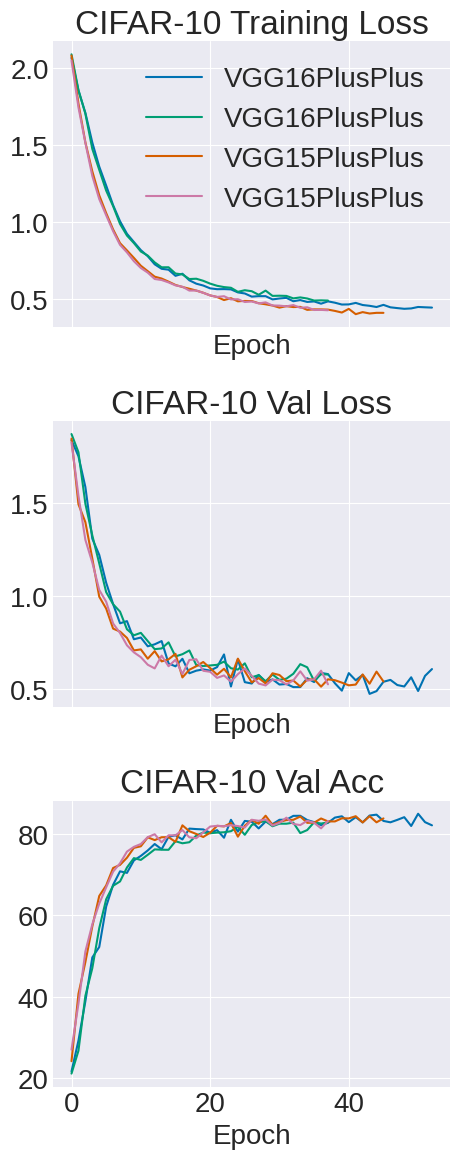

<Figure size 640x480 with 0 Axes>

In [7]:
def plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs,
                     net_names=['VGG15PlusPlus', 'VGG15', 'VGG15Plus', 'VGG4Plus']):
    '''Makes a 3x1 plot of the training losses, val losses, and val accs for the 4 nets.

    This complete function is provided to you. Feel free to modify if necessary.

    Parameters:
    -----------
    train_losses: Python list of list. len(train_losses)=4.
        List of the training loss histories of the 4 nets.
    val_losses: Python list of list. len(val_losses)=4.
        List of the val loss histories of the 4 nets.
    val_accs: Python list of list. len(val_accs)=4.
        List of the val accuracy histories of the 4 nets.
    epochs: Python list of int. len(epochs)=4.
        The number of epochs used to train each network.
    net_names: Python list of str. len(epochs)=4.
        The string name of the networks. The order must correspond to the order of the loss and acc lists.
    '''
    fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(5, 12))

    titles = ['CIFAR-10 Training Loss', 'CIFAR-10 Val Loss', 'CIFAR-10 Val Acc']
    xlabels = 3*['Epoch']
    data = [train_losses, val_losses, val_accs]

    for i in range(len(titles)):
        curr_hist = data[i]

        for n in range(len(net_names)):
            curr_data = np.copy(np.array(curr_hist[n]))

            if 'acc' in titles[i].lower():
                curr_data = 100*curr_data[:epochs[n]]

            axes[i].plot(curr_data, label=net_names[n])

        axes[i].set_xlabel(xlabels[i])
        # axes[i].set_ylabel(ylabels[i])
        axes[i].set_title(titles[i])

        if i == 0:
            axes[i].legend()

    plt.tight_layout()
    plt.show()

plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs, net_names)
from matplotlib import pyplot as plt 
plt.savefig('figure.png')



In [13]:
import numpy as np 

np.savez('val_acc.npz', val_accs[0], val_accs[1], val_accs[2], val_accs[3])
np.savez('train_acc.npz', train_losses[0], train_losses[1], train_losses[2], train_losses[3])
np.savez('val_loss.npz', val_losses[0], val_losses[1], val_losses[2], val_losses[3])


# We see a couple of things here:

1. VGG16PlusPlus trains successfully with the given hyperparameters
2. VGG15PlusPlus converges a bit faster and has a slightly lower minimum validation loss.  This could mean that it performs better generally.
3. When training VGG15PlusPlus and VGG16PlusPlus, the size of the dense layers seems to have little impact on training for the sizes given \(512 vs 2048\).
4. When setting the dense block before the output to 4096 neurons, we see that the model will refuse to learn in some cases, buit in other cases, I found that learning \(and very respectable performance\) was possible.  I'm not sure why this behavior occurred.
5. Changing the weight scale to 1e\-4 allowed for slower learning which helped the models perform better.
6. Changing regularization from 0.6 to 0.3 allowed for the model to learn features more strongly which contributed to slightly better performance along with the change in weight decay.  84\-85% accuracy over 80\-81%.



### In Summary:

We developed and trained VGG16PlusPlus, which is VGG15PlusPlus with an extra dense block.

We compared the performance and convergence behavior of VGG16PlusPlus to VGG15PlusPlus \-\- VGG15PlusPlus **may** be better but it's hard to say. It definitely finds a lower loss  \(could just be from having less parameters\) it does not necessarily have universally better accuracy, they're about the same and it depends on the variability of the given trianing run.

We also compared intra\-model performance when varying the size of the dense blocks.  We couldn't see a strong impact on performance when the model could learn on the larger layer, but on 4096 units, either model would have cases where it refused to train, which led us to change some of the sizes until we could consistently train.

We conducted a small scale hyperparameter search to gain an extra 3\-4% accuracy on our models 

